# 🎉 Welcome to the ' SheCures: AI for Diabetes Prediction – Celebrating International Girls in ICT Day' Hackathon Starter Notebook
This notebook will help you get started on your journey to building an AI model for predicting diabetes types in African women.
**Organized by Dare to be Women Tech** in celebration of *International Girls in ICT Day*.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## 🧩 Problem Statement
Your task is to build a machine learning model that can classify the type of diabetes (e.g., Type 2 or gestational) in women based on health-related features.

In [ ]:
# !pip install -U scikit-learn

In [2]:
# 📦 Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 📂 Load the dataset (update the path as needed)
df = pd.read_csv("data/Train.csv")
df

,Genetic Markers,Family History,Insulin Levels,Blood Glucose Levels,Glucose Tolerance Test,BMI,Waist Circumference,Physical Activity,Dietary Habits,Smoking Status,...,Blood Pressure,Cholesterol Levels,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Ethnicity,Socioeconomic Factors,Target,ID
0,Negative,No,33,147,Abnormal,29,34,Moderate,Healthy,Non-Smoker,...,125,207,Normal,No,Complications,28,Low Risk,Low,Type 2 Diabetes,ID_0000ff
1,Negative,Yes,20,118,Normal,24,35,High,Unhealthy,Non-Smoker,...,121,210,Normal,Yes,Complications,15,High Risk,Medium,Prediabetic,ID_000372
2,Negative,Yes,14,142,Abnormal,22,30,Low,Healthy,Non-Smoker,...,90,167,Normal,Yes,Complications,13,Low Risk,Low,Type 1 Diabetes,ID_0005b8
3,Negative,Yes,38,141,Abnormal,27,34,High,Healthy,Smoker,...,119,219,Normal,No,Normal,25,Low Risk,High,Type 2 Diabetes,ID_000f18
4,Positive,Yes,20,120,Abnormal,24,36,Low,Unhealthy,Smoker,...,120,223,Normal,Yes,Complications,10,Low Risk,Medium,Gestational Diabetes,ID_0011f6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15089,Positive,Yes,29,138,Abnormal,22,38,Moderate,Unhealthy,Non-Smoker,...,111,210,Abnormal,Yes,Normal,20,Low Risk,High,Gestational Diabetes,ID_ffe5d3
15090,Positive,No,15,144,Abnormal,30,48,Low,Unhealthy,Smoker,...,144,262,Normal,Yes,Complications,39,High Risk,Low,Type 2 Diabetes,ID_fff1d7
15091,Negative,No,16,111,Abnormal,20,30,Moderate,Unhealthy,Non-Smoker,...,126,199,Normal,No,Normal,22,High Risk,Low,Gestational Diabetes,ID_fff4b9
15092,Positive,Yes,13,114,Normal,24,38,Low,Healthy,Non-Smoker,...,124,213,Normal,No,Normal,11,Low Risk,High,Prediabetic,ID_fff583


In [4]:
# ℹ️ Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15094 entries, 0 to 15093
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Genetic Markers                15094 non-null  object
 1   Family History                 15094 non-null  object
 2   Insulin Levels                 15094 non-null  int64 
 3   Blood Glucose Levels           15094 non-null  int64 
 4   Glucose Tolerance Test         15094 non-null  object
 5   BMI                            15094 non-null  int64 
 6   Waist Circumference            15094 non-null  int64 
 7   Physical Activity              15094 non-null  object
 8   Dietary Habits                 15094 non-null  object
 9   Smoking Status                 15094 non-null  object
 10  Alcohol Consumption            15094 non-null  object
 11  Blood Pressure                 15094 non-null  int64 
 12  Cholesterol Levels             15094 non-null  int64 
 13  L

In [5]:
# 📊 Basic statistics
df.describe()

,Insulin Levels,Blood Glucose Levels,BMI,Waist Circumference,Blood Pressure,Cholesterol Levels,Weight Gain During Pregnancy
count,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000
mean,20.145952,128.760302,26.078309,35.738174,117.043328,208.352458,20.120578
std,9.633169,25.548681,5.607679,5.041412,12.844156,34.766744,7.616550
min,5.000000,90.000000,15.000000,28.000000,90.000000,150.000000,5.000000
25%,13.000000,110.000000,22.000000,32.000000,109.000000,182.000000,15.000000
50%,18.000000,122.000000,26.000000,35.000000,117.000000,204.000000,20.000000
75%,25.000000,141.000000,30.000000,39.000000,125.000000,230.000000,25.000000
max,49.000000,199.000000,39.000000,49.000000,149.000000,299.000000,39.000000


In [6]:
# Class distribution
df['Target'].value_counts()

,count
Target,
Type 1 Diabetes,3825
Type 2 Diabetes,3795
Prediabetic,3752
Gestational Diabetes,3722


In [7]:
## encodage de la variable cible pour le model xgboost
from sklearn.preprocessing import LabelEncoder

y = df.Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [8]:
# Voir toutes les classes dans l'ordre
class_name = le.classes_
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} → {i}")


Gestational Diabetes → 0
Prediabetic → 1
Type 1 Diabetes → 2
Type 2 Diabetes → 3


<Axes: >

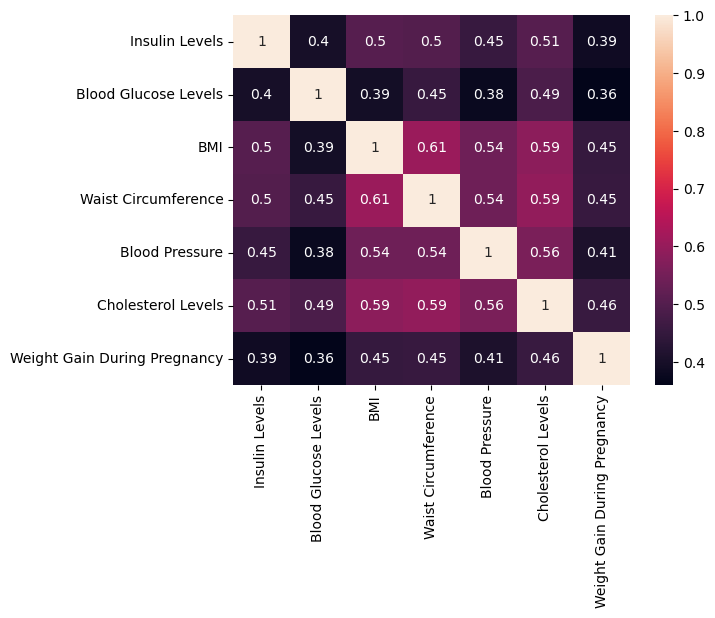

In [ ]:
#  Correlation heatmap Pour la visualisation de la correlation entre les variables.
sns.heatmap(df.corr(numeric_only = True),annot = True)

# **separation** des donnees

In [9]:
X = df.drop(["Target", "ID"], axis=1)
Y = df.Target
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['Genetic Markers',
 'Family History',
 'Glucose Tolerance Test',
 'Physical Activity',
 'Dietary Habits',
 'Smoking Status',
 'Alcohol Consumption',
 'Liver Function Tests',
 'Previous Gestational Diabetes',
 'Pregnancy History',
 'Ethnicity',
 'Socioeconomic Factors']

In [10]:
# 🎯 Data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

num_features = numerical_features
cat_features = categorical_features

num_transformer = Pipeline([
    ("imputer", KNNImputer(n_neighbors = 5)),
    ("scaler", StandardScaler()) ## normalisation des donnees numerique avec StandardScaler
])

# cat_transformer = Pipeline([
#     ("encoder", OneHotEncoder(handle_unknown = "ignore"))
# ])
cat_transformer = Pipeline([
    ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) #utilisation du label encoding pour les variables categorielles
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [23]:
# Encode categorical variables and split features/target as needed
df_cleaned = preprocessor.fit_transform(X)
new_columns = (
    num_features +
    list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features))
)

# Convert in Pandas DataFrame
df_cleaned = pd.DataFrame(df_cleaned, columns=new_columns)

X_train,X_test,y_train,y_test = train_test_split(df_cleaned, y_encoded, test_size = 0.2, random_state = 42)

In [12]:
# 🤖 Baseline prediction Model
# Modèle SVM
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True)

# Forêt aléatoire
forest_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)

# Régression logistique
reg_model = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="auto")

models =[svm_model, forest_model, tree_model, reg_model]

def train_model(model,xtrain,ytrain,xtest,ytest):
    print("", model)
    model.fit(xtrain,ytrain)

    ypred = model.predict(xtest)
    report = classification_report(ypred, ytest)
    acc = accuracy_score(ypred, ytest)

    return ypred, acc


for m in models:
    ypred , acc = train_model(m, X_train, y_train, X_test, y_test)
    print(acc)



 SVC(probability=True)
0.9327591917853594
 RandomForestClassifier(class_weight='balanced', random_state=42)
0.9841006955945677
 DecisionTreeClassifier(random_state=42)
0.9566081483935078
 LogisticRegression(max_iter=1000, multi_class='auto')
0.8367008943358728


In [13]:
#choose the best model
best_model = forest_model
y_pred = best_model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

                      precision    recall  f1-score   support

Gestational Diabetes       0.94      1.00      0.97       724
         Prediabetic       1.00      0.95      0.97       790
     Type 1 Diabetes       1.00      0.99      1.00       784
     Type 2 Diabetes       1.00      1.00      1.00       721

            accuracy                           0.98      3019
           macro avg       0.98      0.98      0.98      3019
        weighted avg       0.98      0.98      0.98      3019



In [14]:
best_model.score(X_test, y_test)

0.9841006955945677

In [15]:
## creation du model avec les meilleurs parametres
best_model = RandomForestClassifier(n_estimators=200, min_samples_leaf = 1, min_samples_split=2, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)
best_model.score(X_test, y_test)

                      precision    recall  f1-score   support

Gestational Diabetes       0.94      1.00      0.97       724
         Prediabetic       1.00      0.95      0.97       790
     Type 1 Diabetes       1.00      0.99      1.00       784
     Type 2 Diabetes       1.00      1.00      1.00       721

            accuracy                           0.98      3019
           macro avg       0.98      0.98      0.98      3019
        weighted avg       0.98      0.98      0.98      3019



0.9841006955945677

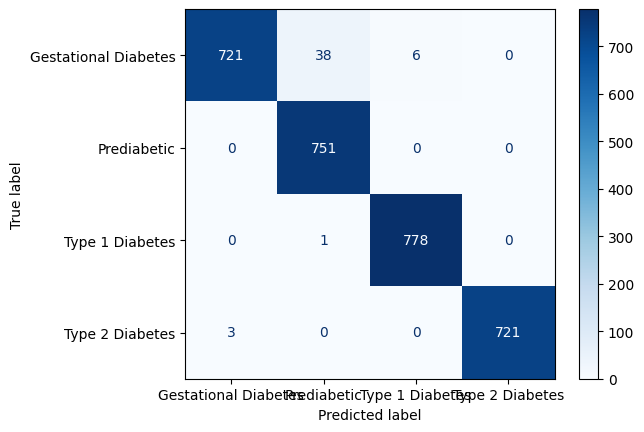

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Prédictions
y_pred = best_model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')

In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_model, df_cleaned, y_encoded, cv=cv, scoring='f1_macro')
print("F1 Macro Score:", scores.mean())

F1 Macro Score: 0.9823035307731169


#Phase Test

In [ ]:
# 📤 Generate submission file (update for actual test set)
test_df = pd.read_csv("data/Test.csv")
test_X = test_df.drop(["ID"], axis=1)

df_cleaned = preprocessor.transform(test_X)
new_columns = (
    num_features +
    list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features))
)
# Convert in Pandas DataFrame
df_cleaned = pd.DataFrame(df_cleaned, columns=new_columns)
df_cleaned

,Insulin Levels,Blood Glucose Levels,BMI,Waist Circumference,Blood Pressure,Cholesterol Levels,Weight Gain During Pregnancy,Genetic Markers,Family History,Glucose Tolerance Test,Physical Activity,Dietary Habits,Smoking Status,Alcohol Consumption,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Ethnicity,Socioeconomic Factors
0,-0.118963,-1.008316,-0.192298,-0.741518,0.230203,-0.642948,-0.672319,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
1,-0.949454,-0.460325,1.056032,-0.939882,0.697357,0.219974,-0.541021,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,-1.053266,-0.421183,-0.013965,0.647028,0.463780,0.162446,-0.278426,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.534209,-0.695178,-0.192298,-0.146427,-0.081233,0.335031,-0.015832,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
4,-0.741832,-1.086601,0.164368,-1.138245,0.775216,-0.959353,-0.409724,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6462,-0.222774,0.244236,0.877699,0.250300,0.930934,0.133682,1.165845,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0
6463,-0.118963,-0.734321,-1.618960,-0.543154,-0.236951,-1.045645,0.115466,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
6464,-0.534209,-0.147187,0.877699,0.647028,-0.781963,0.507615,1.034548,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,2.0
6465,-0.638020,-0.421183,0.342701,0.647028,0.152344,0.363795,0.378061,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0


In [18]:

predictions = best_model.predict(df_cleaned)
predictions


array(['Prediabetic', 'Gestational Diabetes', 'Prediabetic', ...,
       'Gestational Diabetes', 'Prediabetic', 'Type 2 Diabetes'],
      dtype=object)

In [ ]:
submission3 = pd.DataFrame({"id": test_df['ID'], "diabetes_type": predictions})
submission3

,id,diabetes_type
0,ID_001258,Prediabetic
1,ID_002548,Gestational Diabetes
2,ID_002c87,Prediabetic
3,ID_004b83,Prediabetic
4,ID_005d09,Gestational Diabetes
...,...,...
6462,ID_ffac85,Gestational Diabetes
6463,ID_ffb263,Type 1 Diabetes
6464,ID_ffcc7c,Gestational Diabetes
6465,ID_ffe3c6,Prediabetic


In [ ]:
submission3.to_csv('submission3.csv', index=False)

## 🚀 Next Steps
- Try more advanced models (XGBoost, etc.)
- Perform feature engineering and selection
- Consider model interpretability (SHAP, LIME) for healthcare applications

Good luck, and thank you for being part of this impactful challenge! 💙

In [ ]:
!pip install xgboost

In [24]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# ⚠️ Assure-toi que tes données sont déjà nettoyées et transformées
# (X_train_cleaned, X_test_cleaned, y_train, y_test)

# Création du modèle
xgb_model = XGBClassifier(
    objective="multi:softmax",  # ou "multi:softprob" pour probabilités
    num_class=4,                # nombre de classes dans la target
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

# Entraînement
xgb_model.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Accuracy : 0.9817820470354423
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       765
           1       0.95      1.00      0.97       751
           2       0.99      1.00      0.99       779
           3       1.00      1.00      1.00       724

    accuracy                           0.98      3019
   macro avg       0.98      0.98      0.98      3019
weighted avg       0.98      0.98      0.98      3019



# Recherche des meilleurs parametres

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)
best_xgb = grid_search.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs paramètres : {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [25]:
# Création du modèle avec les meilleurs hyperparamètres
best_xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=7,
    n_estimators=200,
    subsample=1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Entraînement
best_xgb_model.fit(X_train, y_train)

# Prédictions
y_pred = best_xgb_model.predict(X_test)

# Évaluation
from sklearn.metrics import accuracy_score, classification_report

print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("\n📊 Rapport de classification :\n")
print(classification_report(y_test, y_pred))

✅ Accuracy : 0.9841006955945677

📊 Rapport de classification :

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       765
           1       0.95      1.00      0.97       751
           2       0.99      1.00      1.00       779
           3       1.00      1.00      1.00       724

    accuracy                           0.98      3019
   macro avg       0.98      0.98      0.98      3019
weighted avg       0.98      0.98      0.98      3019



on obtient le meme score que celui de randomForestClassifier

In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_xgb_model, df_cleaned, y_encoded, cv=cv, scoring='f1_macro')
print("F1 Macro Score:", scores.mean())


F1 Macro Score: 0.9824357521531063


<p>Avec une cross validation de  0.9824357521531063 légèrement superieur a celle de randomForestClassifier. cela nous permet de d'affirmer que notre model generalise bien et est plus robuste que RandomForestClassifier. </p>

## visualisation de la matrice de confusion avec le model xgboost

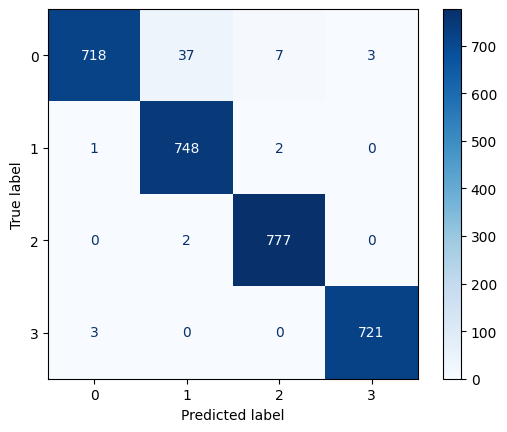

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Prédictions
y_pred = xgb_model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')

## Phase de Test

In [ ]:
# 📤 Generate submission file (update for actual test set)
test_df = pd.read_csv('data/Test.csv')
test_X = test_df.drop(["ID"], axis=1)

df_cleaned_test = preprocessor.transform(test_X)
new_columns = (
    num_features +
    list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features))
)
# Convert in Pandas DataFrame
df_cleaned_test = pd.DataFrame(df_cleaned_test, columns=new_columns)
df_cleaned_test

,Insulin Levels,Blood Glucose Levels,BMI,Waist Circumference,Blood Pressure,Cholesterol Levels,Weight Gain During Pregnancy,Genetic Markers,Family History,Glucose Tolerance Test,Physical Activity,Dietary Habits,Smoking Status,Alcohol Consumption,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Ethnicity,Socioeconomic Factors
0,-0.118963,-1.008316,-0.192298,-0.741518,0.230203,-0.642948,-0.672319,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
1,-0.949454,-0.460325,1.056032,-0.939882,0.697357,0.219974,-0.541021,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,-1.053266,-0.421183,-0.013965,0.647028,0.463780,0.162446,-0.278426,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.534209,-0.695178,-0.192298,-0.146427,-0.081233,0.335031,-0.015832,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
4,-0.741832,-1.086601,0.164368,-1.138245,0.775216,-0.959353,-0.409724,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6462,-0.222774,0.244236,0.877699,0.250300,0.930934,0.133682,1.165845,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0
6463,-0.118963,-0.734321,-1.618960,-0.543154,-0.236951,-1.045645,0.115466,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
6464,-0.534209,-0.147187,0.877699,0.647028,-0.781963,0.507615,1.034548,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,2.0
6465,-0.638020,-0.421183,0.342701,0.647028,0.152344,0.363795,0.378061,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0


In [28]:
predictions = xgb_model.predict(df_cleaned)
predictions

array([3, 1, 2, ..., 0, 1, 0], dtype=int32)

In [29]:
y_class = le.classes_
print(y_class)

['Gestational Diabetes' 'Prediabetic' 'Type 1 Diabetes' 'Type 2 Diabetes']


In [30]:
predictions_decoded = pd.Series(predictions).replace({0: "Gestational Diabetes", 1: "Prediabetic", 2: "Type 1 Diabetes", 3: "Type 2 Diabetes"})
predictions_decoded


,0
0,Type 2 Diabetes
1,Prediabetic
2,Type 1 Diabetes
3,Type 2 Diabetes
4,Gestational Diabetes
...,...
15089,Gestational Diabetes
15090,Type 2 Diabetes
15091,Gestational Diabetes
15092,Prediabetic


In [ ]:
submission3 = pd.DataFrame({"id": test_df['ID'], "diabetes_type": predictions_decoded})
submission3

,id,diabetes_type
0,ID_001258,Type 2 Diabetes
1,ID_002548,Prediabetic
2,ID_002c87,Type 2 Diabetes
3,ID_004b83,Gestational Diabetes
4,ID_005d09,Type 2 Diabetes
...,...,...
30123,NaN,Type 1 Diabetes
30124,NaN,Type 1 Diabetes
30125,NaN,Type 1 Diabetes
30126,NaN,Type 1 Diabetes


In [ ]:
submission3.to_csv('submission3.csv', index=False)

## visualisation des variables importantes pour les predictions

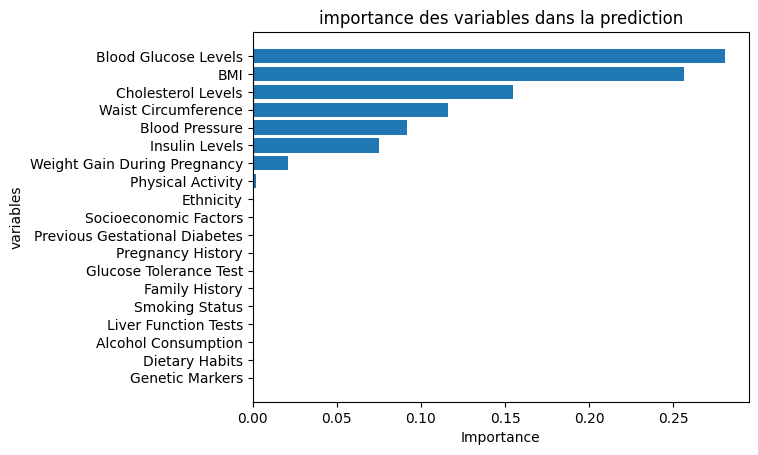

<Figure size 2500x2000 with 0 Axes>

In [31]:
#Affichage de l'importance des variables
importance = pd.Series(best_xgb_model.feature_importances_ ,index=X_train.columns)
importance_sorted = importance.sort_values()
plt.barh(importance_sorted.index, importance_sorted)
plt.title('importance des variables dans la prediction')
plt.xlabel('Importance')
plt.ylabel('variables')
plt.figure(figsize=(25, 20))
plt.show()

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Récupérer les importances
importances = best_xgb_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by="importance", ascending=False)

# Seuil : 3% d’importance : on recupere toutes les variables dont l'importance est inferieur a 3%
low_importance_features = importance_df[importance_df["importance"] < 0.03]["feature"].tolist()
print(f"Variables à envisager pour suppression ({len(low_importance_features)}):\n", low_importance_features)


Variables à envisager pour suppression (13):
 ['Weight Gain During Pregnancy', 'Physical Activity', 'Ethnicity', 'Socioeconomic Factors', 'Previous Gestational Diabetes', 'Glucose Tolerance Test', 'Family History', 'Genetic Markers', 'Dietary Habits', 'Liver Function Tests', 'Alcohol Consumption', 'Smoking Status', 'Pregnancy History']


## Entrainement du model avec les features les plus importantes

In [33]:
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

model_reduced = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=7,
    n_estimators=200,
    subsample=1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
model_reduced.fit(X_train_reduced, y_train)

accuracy_reduced = model_reduced.score(X_test_reduced, y_test)
print("Accuracy après suppression des variables peu importantes :", accuracy_reduced)


Accuracy après suppression des variables peu importantes : 0.9831069890692282


le score diminue

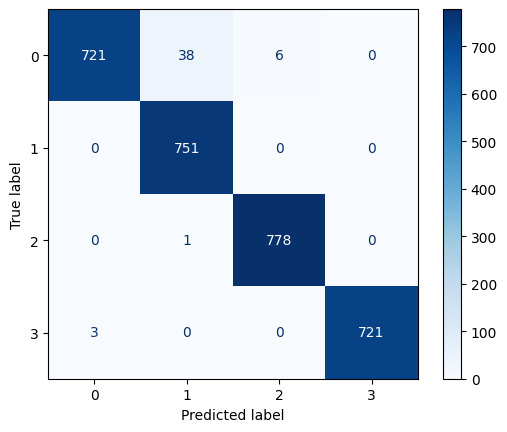

In [34]:
# Prédictions
y_pred = best_xgb_model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb_model.classes_)
disp.plot(cmap='Blues')

100%|===================| 24373/24432 [06:46<00:00]       

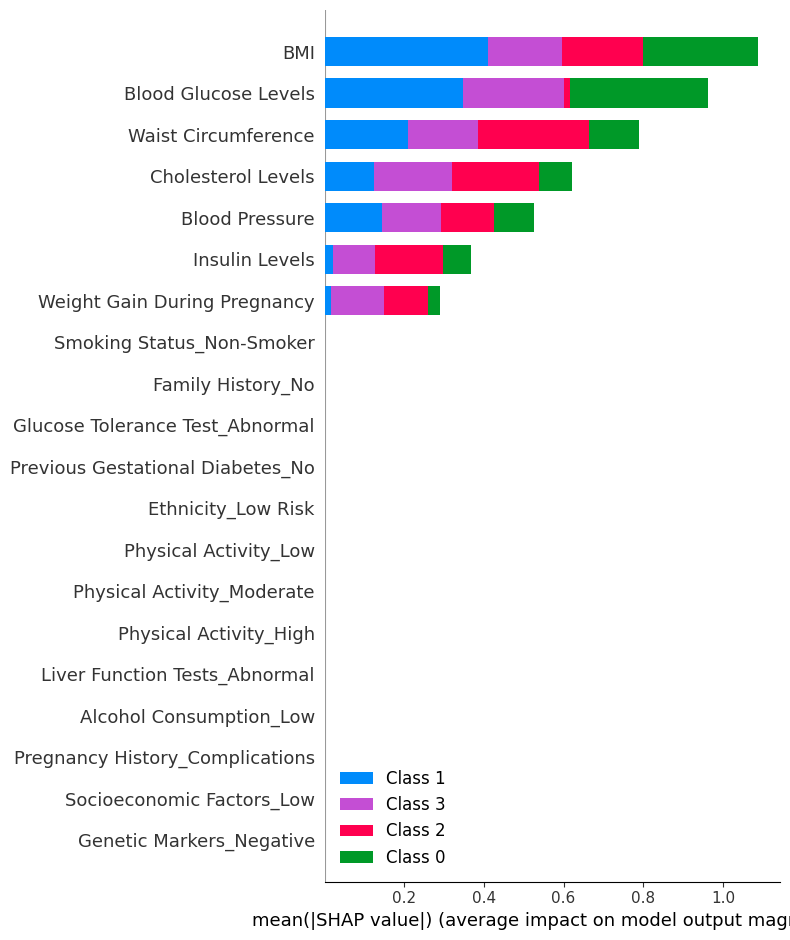

In [ ]:
import shap

# 1. SHAP explainer
explainer = shap.Explainer(best_xgb_model, X_train)

# 2. SHAP values (pour chaque prédiction et chaque feature)
shap_values = explainer(X_train)

# 3. Moyenne des impacts
shap.summary_plot(shap_values, X_train)


Les résultats nous montre que les features tels que le BMI, le taux de glucose et le tour de taille, ressortent comme les facteurs les plus déterminants, toutes classes confondues.


## Choix  du model final pour la soumission
on va sauvegarder le model basé sur le randomforestclassifier

In [35]:
import joblib

joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']